In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
df = pd.read_csv('/content/dataset1.csv')
df = df.drop(["Unnamed: 0"], axis=1)

In [0]:
X = df.drop(["y"], axis = 1)
y = df["y"]

In [0]:
for i in range(len(y)):
  if y[i] == 10: y[i]=1

In [5]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5711    1.0
5712    1.0
5713    1.0
5714    1.0
5715    1.0
Name: y, Length: 5716, dtype: float64

In [0]:
X_train, X_a, y_train, y_a = train_test_split(X,y,test_size = 2/12)

In [0]:
X_b,X_test,y_b,y_test = train_test_split(X_a,y_a,test_size = 1/2)

In [0]:
X_train_shaped = np.expand_dims(X_train, axis=2)
X_a = np.expand_dims(X_a, axis=2)
X_test_shaped = np.expand_dims(X_test, axis=2)

In [296]:
X_a.shape

(953, 4, 1)

# CNN Model


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Dropout

In [0]:
model = Sequential()

model.add(Conv1D(64, kernel_size = 3, activation = 'relu', input_shape = (4,1)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))

In [0]:
optimizer = Adam(lr=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [300]:




history = model.fit(X_train_shaped, y_train, validation_data = (X_a,y_a), epochs = 200, batch_size= 32)

Epoch 1/200
149/149 [==============================] - 0s 3ms/step - loss: 0.7271 - accuracy: 0.4825 - val_loss: 0.6922 - val_accuracy: 0.5110
Epoch 2/200
149/149 [==============================] - 0s 2ms/step - loss: 0.7179 - accuracy: 0.4930 - val_loss: 0.6853 - val_accuracy: 0.5310
Epoch 3/200
149/149 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.5163 - val_loss: 0.6794 - val_accuracy: 0.5446
Epoch 4/200
149/149 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5345 - val_loss: 0.6739 - val_accuracy: 0.5918
Epoch 5/200
149/149 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5463 - val_loss: 0.6685 - val_accuracy: 0.6275
Epoch 6/200
149/149 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5511 - val_loss: 0.6634 - val_accuracy: 0.6579
Epoch 7/200
149/149 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5660 - val_loss: 0.6587 - val_accuracy: 0.6810

In [301]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 2, 64)             256       
_________________________________________________________________
flatten_6 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 9,569
Trainable params: 9,569
Non-trainable params: 0
____________________________________________________

In [302]:
X_train_shaped.shape

(4763, 4, 1)

In [303]:
score = model.evaluate(X_test_shaped, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.5484460592269897 / Test accuracy: 0.7023060917854309


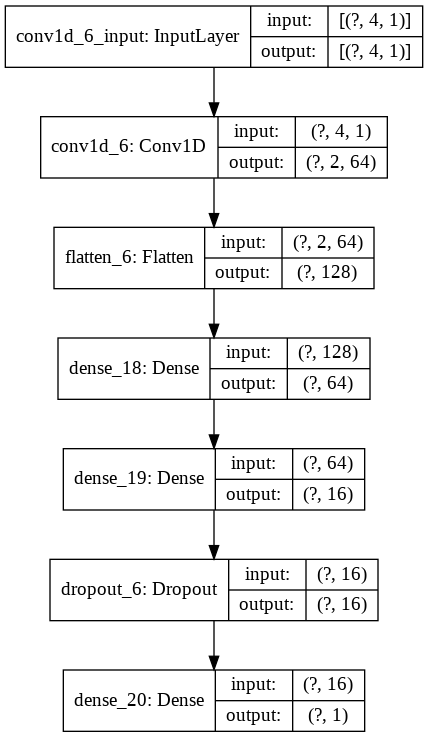

In [304]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes= True)

In [0]:
X_b_shaped = np.expand_dims(X_b, axis=2)
count=0
test_pred = model.predict_classes(X_b_shaped)
k1 = np.array(test_pred[:,0])
k2 = np.array(y_b)
for i in range(len(y_b)):
  if k1[i] == k2[i]:
    count = count+1
accuracy = (count*100)/len(y_b)

In [306]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 2, 64)             256       
_________________________________________________________________
flatten_6 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 9,569
Trainable params: 9,569
Non-trainable params: 0
____________________________________________________

In [307]:
accuracy

74.36974789915966

In [0]:
import matplotlib.pyplot as plt

In [309]:
history.history

{'accuracy': [0.48246902227401733,
  0.4929666221141815,
  0.5162712335586548,
  0.5345370769500732,
  0.5462943315505981,
  0.5511232614517212,
  0.5660297870635986,
  0.5716984868049622,
  0.5834558010101318,
  0.5947932004928589,
  0.6090699434280396,
  0.6197774410247803,
  0.6279655694961548,
  0.6330044269561768,
  0.635313868522644,
  0.6338441967964172,
  0.6422423124313354,
  0.645391583442688,
  0.6489607095718384,
  0.6539995670318604,
  0.6489607095718384,
  0.6586185097694397,
  0.6537896394729614,
  0.6678563952445984,
  0.663237452507019,
  0.6554692387580872,
  0.668276309967041,
  0.665966808795929,
  0.6623976230621338,
  0.6691160798072815,
  0.6705857515335083,
  0.6678563952445984,
  0.6808733940124512,
  0.6743649244308472,
  0.66575688123703,
  0.6804534792900085,
  0.6789838075637817,
  0.6831828951835632,
  0.6731051802635193,
  0.6800335645675659,
  0.679823637008667,
  0.6819231510162354,
  0.691161036491394,
  0.6869620084762573,
  0.6857022643089294,
  0.68

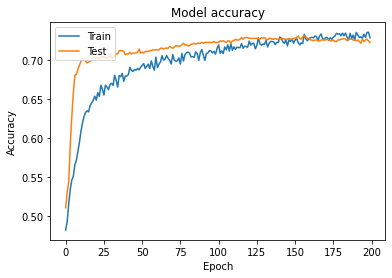

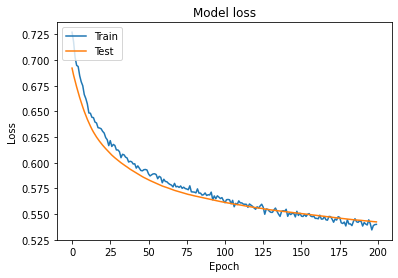

In [310]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [312]:
acc = accuracy_score(k2, k1)
f1 = f1_score(k2, test_pred[:,0])
y_score = model.predict_proba(X_b_shaped)
roc = roc_auc_score(k2, y_score)
print('The accuracy of this model is ' + str(acc))
print('The f1 score of this model is ' + str(f1))
print('The area under curve of this model is ' + str(roc))
print('The confusion matrix is as follows:')
print(confusion_matrix(y_b, test_pred[:,0]))

The accuracy of this model is 0.7436974789915967
The f1 score of this model is 0.7458333333333332
The area under curve of this model is 0.8081312032270049
The confusion matrix is as follows:
[[175  52]
 [ 70 179]]


Text(0, 0.5, 'True Positive Rate')

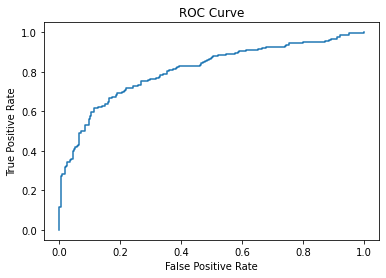

In [313]:
fpr, tpr,x = roc_curve( k2, y_score)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Testing on New files

In [0]:
import numpy as np
import math
import cv2

In [0]:
from scipy.spatial import distance
from mlxtend.image import extract_face_landmarks

In [0]:
def images(x):
    vc.set(cv2.CAP_PROP_POS_MSEC, x)
    result,image = vc.read()
    return result, image

In [0]:
path = '/content/drive/My Drive/Untitled folder/Video/'
filename = 'test1.mp4'

In [258]:
lm =[]
frames_max = 800 #number of frames needed per video
vc = cv2.VideoCapture(path + filename)
tim = 0
result, image  = images(tim)
count = 0
while result and count < frames_max: 
    landmarks = extract_face_landmarks(image)
    if sum(sum(landmarks)) != 0:
        lm.append(landmarks)
        tim +=600 
        result, image = images(tim)
        count += 1
        if count%10 == 0: print('Extracted face landmarks from '+str(count)+' frames')
    else:  
        tim += 600
        result, image = images(tim)
        print('Face not detected in this frame, till now extracted from '+str(count)+' frames')
lm = np.array(lm)

Extracted face landmarks from 10 frames
Extracted face landmarks from 20 frames
Extracted face landmarks from 30 frames
Extracted face landmarks from 40 frames
Extracted face landmarks from 50 frames
Extracted face landmarks from 60 frames
Extracted face landmarks from 70 frames
Extracted face landmarks from 80 frames
Extracted face landmarks from 90 frames
Extracted face landmarks from 100 frames
Extracted face landmarks from 110 frames
Extracted face landmarks from 120 frames
Extracted face landmarks from 130 frames
Extracted face landmarks from 140 frames


/usr/local/lib/python3.6/dist-packages/mlxtend/image/extract_face_landmarks.py:61: UserWarning: No face detected.
  warnings.warn('No face detected.')


Face not detected in this frame, till now extracted from 146 frames
Extracted face landmarks from 150 frames
Extracted face landmarks from 160 frames
Extracted face landmarks from 170 frames
Extracted face landmarks from 180 frames
Extracted face landmarks from 190 frames
Extracted face landmarks from 200 frames
Extracted face landmarks from 210 frames


In [0]:
def EAR(arr):
	x1,x2,x3 = distance.euclidean(arr[1], arr[5]),distance.euclidean(arr[2], arr[4]),distance.euclidean(arr[0], arr[3])
	frac = (x1+ x2) / (2.0 * x3)
	return frac

def MAR(arr):
    x1,x2 = distance.euclidean(arr[14], arr[18]), distance.euclidean(arr[12], arr[16])
    frac = x1/x2
    return frac

def PUC(arr):
    r = distance.euclidean(arr[1], arr[4])/2.0
    area = math.pi*(r**2)
    peri = 0
    for i in range(0,5):
      peri = peri + distance.euclidean(arr[i], arr[i+1])
    peri = peri + distance.euclidean(arr[5], arr[0])
    return 4 * math.pi * area /(peri**2)

In [0]:
features = []
for l in lm:
  mainMarks = l[36:68]
  x1, x2, x3 = EAR(mainMarks), MAR(mainMarks), PUC(mainMarks)
  features.append([x1, x2, x3, x2/x1])
features = np.array(features)

In [0]:
np.savetxt("test1.csv", features, delimiter = ",")

In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('/content/test1.csv')

In [0]:
df.columns = ['x1','x2','x3','x4']

In [0]:
df_temp = df.iloc[0:3, :]
df_mean = df_temp.mean()
df_std = df_temp.std()
df["x1_norm"]=(df["x1"]-df_mean["x1"])/df_std["x1"]
df["x2_norm"]=(df["x2"]-df_mean["x2"])/df_std["x2"]
df["x3_norm"]=(df["x3"]-df_mean["x3"])/df_std["x3"]
df["x4_norm"]=(df["x4"]-df_mean["x4"])/df_std["x4"]

In [226]:
df

,x1,x2,x3,x4,x1_norm,x2_norm,x3_norm,x4_norm
0,0.273810,0.981272,0.433081,3.583776,-1.103997,0.499450,-0.456990,1.118775
1,0.298487,0.985739,0.445401,3.302454,0.845074,0.651891,1.146847,-0.311887
2,0.291066,0.932899,0.431292,3.205118,0.258923,-1.151342,-0.689856,-0.806888
3,0.330244,1.000000,0.455564,3.028065,3.353318,1.138569,2.469896,-1.707289
4,0.292596,1.089870,0.447431,3.724831,0.379795,4.205533,1.411046,1.836107
...,...,...,...,...,...,...,...,...
205,0.270097,1.003771,0.443544,3.716338,-1.397234,1.267268,0.905030,1.792919
206,0.256965,1.018859,0.406857,3.964970,-2.434398,1.782174,-3.870750,3.057331
207,0.223684,1.008806,0.365734,4.509955,-5.063010,1.439081,-9.224126,5.828851
208,0.263361,1.007321,0.371471,3.824860,-1.929209,1.388401,-8.477314,2.344805


In [0]:
df = df.drop(["x1","x2","x3","x4"],axis=1)

In [228]:
df

,x1_norm,x2_norm,x3_norm,x4_norm
0,-1.103997,0.499450,-0.456990,1.118775
1,0.845074,0.651891,1.146847,-0.311887
2,0.258923,-1.151342,-0.689856,-0.806888
3,3.353318,1.138569,2.469896,-1.707289
4,0.379795,4.205533,1.411046,1.836107
...,...,...,...,...
205,-1.397234,1.267268,0.905030,1.792919
206,-2.434398,1.782174,-3.870750,3.057331
207,-5.063010,1.439081,-9.224126,5.828851
208,-1.929209,1.388401,-8.477314,2.344805


In [0]:
df = np.expand_dims(df, axis=2)
tp = model.predict_classes(df)

In [0]:
tp = np.array(tp)

In [0]:
val = []
for i in range(len(tp)): val.append(tp[i][0])

# Output graph

Text(0.5, 1.0, 'label vs time')

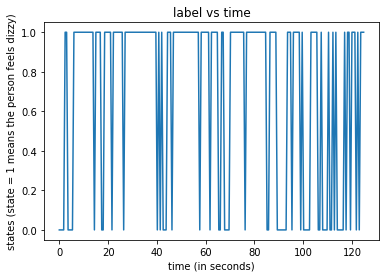

In [232]:
x = np.arange(0,(len(val)*0.6)-1,0.6)
plt.plot(x,val[:len(val)-1])
plt.xlabel('time (in seconds)')
plt.ylabel('states (state = 1 means the person feels dizzy)')
plt.title('label vs time')

In [0]:
def straighter(arr):
  new_val = []
  new_val = [arr[0],arr[1]]
  for i in range(len(arr)):
    b1 = 0
    if arr[i-2] == 1: b1=b1+1
    if arr[i-1] == 1: b1=b1+1
    if arr[i] == 1: b1=b1+1
    if b1>1: new_val.append(1)
    if b1==0 or b1==1: new_val.append(0)
  return new_val

In [0]:
new_val = straighter(val)

In [0]:
new_val = straighter(new_val)

Text(0.5, 1.0, 'label vs time')

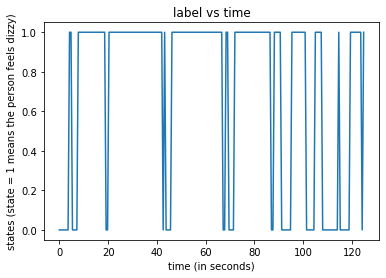

In [235]:
plt.plot(x,new_val[:len(val)-1])
plt.xlabel('time (in seconds)')
plt.ylabel('states (state = 1 means the person feels dizzy)')
plt.title('label vs time')

In [0]:
def straight1(arr):
  temp = []
  temp = [arr[0],arr[1]]
  for i in range(len(arr)-2):
    co=0
    co = [arr[i-2],arr[i-1],arr[i],arr[i+1],arr[i+2]].count(1)
    if co >2: temp.append(1)
    else: temp.append(0)
  return temp

In [0]:
val1 = straight1(val)

Text(0.5, 1.0, 'label vs time')

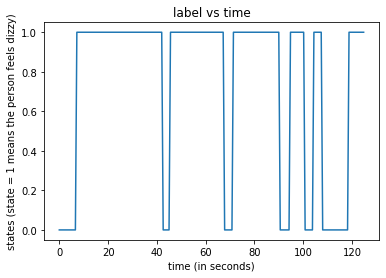

In [238]:
plt.plot(x,val1[:len(val)-1])
plt.xlabel('time (in seconds)')
plt.ylabel('states (state = 1 means the person feels dizzy)')
plt.title('label vs time')

# Generating JSON file

In [128]:
y_score.shape

(476, 1)

In [0]:
fin=[]
for i in range(len(val)):
  fin.append([str(i*0.6),str(val[i])])

In [0]:
dt = {}
dt['dizzy']=fin

In [0]:
import json

In [0]:
with open('test5.json', 'w') as f:
    json.dump(dt, f)

## Saving model



In [0]:
model.save_weights("model_weights.h5")

In [0]:
model.save('my_model.h5')